### **Purpose - Exploratory Data Analysis (EDA)**

**Part 1**: Imports, links, and loading

**Part 2**: Data Exploration ,Data cleaning

**Part 3**: Building visualizations

**Part 4**: Evaluating and sharing results



### **Imports and data loading**

In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt





In [2]:
df = pd.read_csv('waze_dataset.csv')

### **Data exploration and cleaning**

In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


We are interested in user churn so the label column is essential.

In [4]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
df.size

194987

The number of non-null values is less than the total number of rows, indicating that there are missing values in the dataset.

In [7]:
df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

If the missing data are entirely random and have no connection to the actual data values, we can simply remove the rows with missing values and continue with our analysis.However, if there's a reason why some data is missing, we need to figure out why and make sure it won't affect our results. 

### **Visualizations**

* Box plots are used to show the five-number summary of a dataset: the minimum, first quartile, median, third quartile, and maximum. They are also useful for identifying outliers, which are data points that are far from the rest of the data. 

* Histograms are used to show the distribution of a dataset. They are created by dividing the data into bins and then plotting the number of data points that fall into each bin. Histograms can be used to see if a dataset is normally distributed, skewed, or has any other interesting features. 

* Scatter plots are used to show the relationship between two variables. They are created by plotting each data point as a dot on a coordinate plane. The position of the dot on the x-axis corresponds to the value of one variable, and the position of the dot on the y-axis corresponds to the value of the other variable. Scatter plots can be used to see if there is a correlation between the two variables. 

* Bar charts are used to compare categorical data. They are created by plotting a bar for each category. The height of each bar represents the value of the variable for that category. Bar charts can be used to see which category has the highest or lowest value of the variable. 

Defining Helper functions

In [8]:
def bplot(column_str,**kwargs):
    plt.figure(figsize=(5,1))
    sns.boxplot(x=df[column_str],fliersize =1)
    plt.title(f'{column_str} boxplot')

In [9]:
def histogrammer(column_str,median_text = True ,**kwargs):
    median = round(df[column_str].median(),1)
    plt.figure(figsize =(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)
    plt.axvline(median, color='red')         
    if median_text==True:                                    
        ax.text(0.15, 0.75, f'median={median}', color='red',ha="left", va="top", transform=ax.transAxes)      
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

#### 1. The number of occurrence of a user opening the app during the month

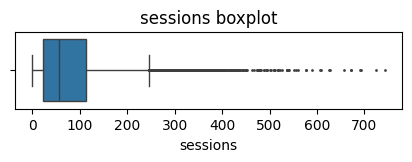

In [10]:
bplot('sessions')

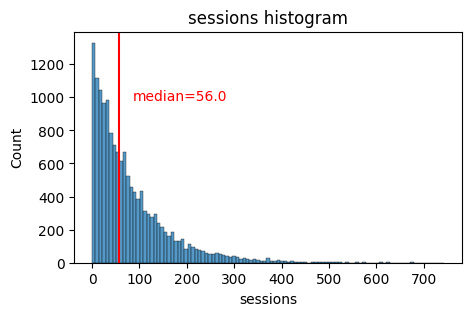

In [11]:
histogrammer('sessions')

The number of sessions for most users is relatively low, with half of the users having 56 sessions or fewer. However, there are also a few users who have a very large number of sessions, with some having over 700 sessions.
This suggests that the data is skewed, with a long tail to the right. This means that there are a few outliers who have a much larger number of sessions than the majority of users.

#### 2. Occurrence of driving at least 1 km during the month

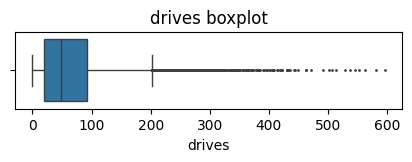

In [12]:
 bplot('drives')

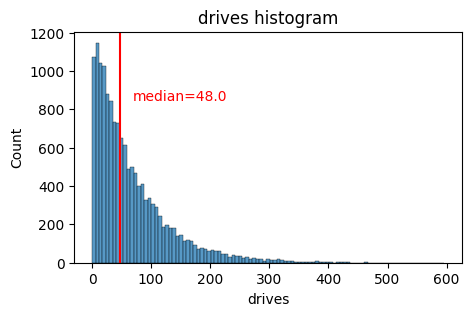

In [13]:
histogrammer('drives')

The above observations is very similar sessions variable where, the number of drives for most drivers is relatively low, with half of the drivers having 48 drives or fewer. However, there are also a few drivers who have a very large number of drives, with some having over 400 drives in the last month.This suggests that the data is skewed, with a long tail to the right. This means that there are a few outliers who have a much larger number of drives than the majority of drivers.

#### 3. Total number of sessions since a user has onboarded

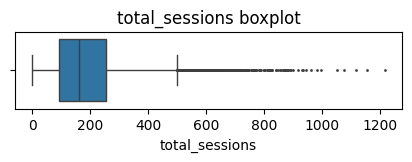

In [14]:
bplot('total_sessions')

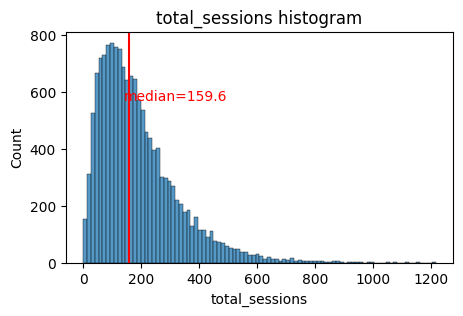

In [15]:
histogrammer('total_sessions')

While the overall number of sessions for users is skewed to the right, it appears more normal compared to the number of sessions and drives in the last month. The median total number of sessions is 159.6, which is significantly higher than the median number of sessions in the last month (48). This suggests that a substantial portion of a user's total sessions might have occurred in the last month, a point worth investigating further.

#### 4. The number of days since a user signed up for the app

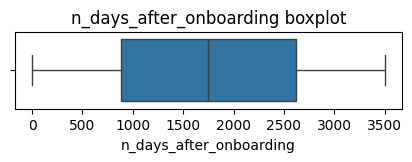

In [16]:
bplot('n_days_after_onboarding')

Median: 1741.0


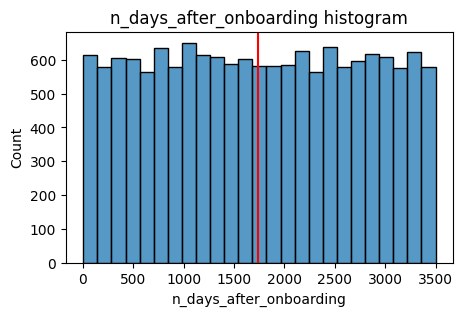

In [17]:
histogrammer('n_days_after_onboarding', median_text=False)

The number of days since users have been on the platform is spread out evenly, with users having anywhere from nearly zero days (newly onboarded) to about 3,500 days (about 9.5 years).This suggests that there is no single group of users who have been on the platform for a similar length of time. Instead, there is a mix of new and old users.

#### 5. Total kilometers driven during the month

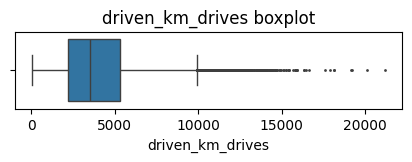

In [18]:
bplot('driven_km_drives')

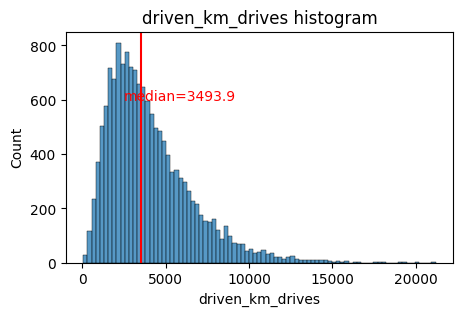

In [19]:
histogrammer('driven_km_drives')

Most users drive a moderate distance in the last month, with half of them driving under 3,495 kilometers. However, some users drive a lot more, with the longest distance driven being over half the circumference of the earth. This indicates that there are a few outliers who drive significantly more than the majority of users.

#### 6. Number of days the user opens the app during the month(Activity Days)

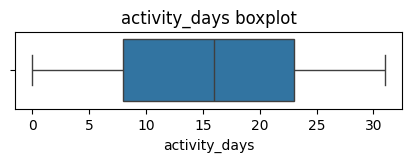

In [20]:
bplot('activity_days')

Median: 16.0


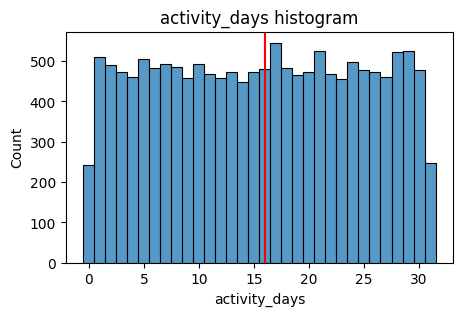

In [21]:
histogrammer('activity_days',median_text = False,discrete=True)

On average, most users opened the app 16 times within the last month. The distribution of app openings is relatively balanced, with approximately 500 people opening the app each day. However, there are also two distinct groups: around 250 people who never opened the app during the month and another 250 people who opened the app every day.

#### 7. Number of days the user drives (at least 1 km) during the month

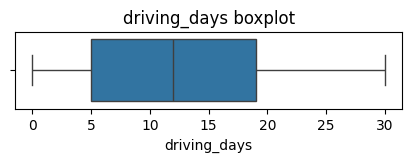

In [22]:
bplot('driving_days')

Median: 12.0


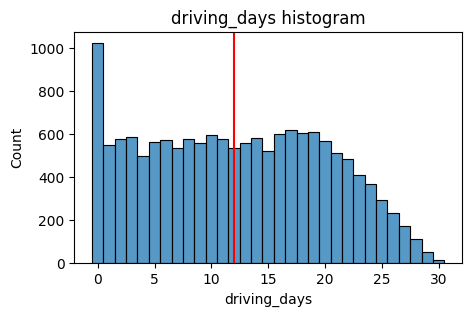

In [23]:
histogrammer('driving_days', median_text = False ,discrete = True)

While the number of days users drove in a month is fairly constant and correlates with the number of days they opened the app, there's a notable discrepancy in the number of users who didn't drive at all.While the activity_days data had ~500 users opening the app on most days and ~250 users who didn't open it at all, the driving_days data has twice as many users who didn't drive at all.This suggests a pattern that warrants further investigation.

#### 8.The type of device a user starts a session with

This is a categorical variable. A good plot for a binary categorical variable is a pie chart.

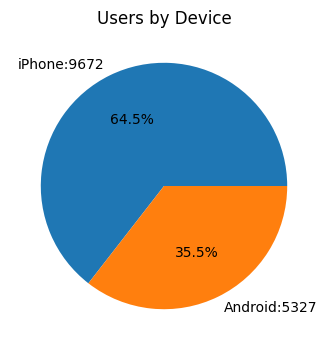

In [24]:
plt.figure(figsize=(4,4))
data = df['device'].value_counts()
plt.pie(data,labels = [f'{data.index[0]}:{data.values[0]}',f'{data.index[1]}:{data.values[1]}'],autopct='%1.1f%%')
plt.title('Users by Device');

There are almost twice as many users in this dataset who use iPhones compared to those who use Android devices.

#### 9. "Retained" vs "churned" 
Binary target variable that indicates whether a user has churned (stopped using the app or service) at any point during the month.

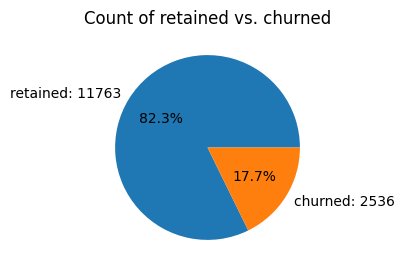

In [25]:
plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Vast majority of users (over 82%) continued to use the app or service throughout the month. This suggests that the app or service is providing value to its users and is meeting their needs.

#### 10. Driving days vs. Activity days
Plotting both driving_days and activity_days together on a single histogram allows for a direct comparison of the distributions of these two variables, which are both counts of days over a month and are closely related.

By visualizing the distributions side-by-side, it becomes easier to identify any patterns or correlations between the two variables. This can help in understanding how driving behavior relates to app usage and in identifying potential factors that influence both activities.

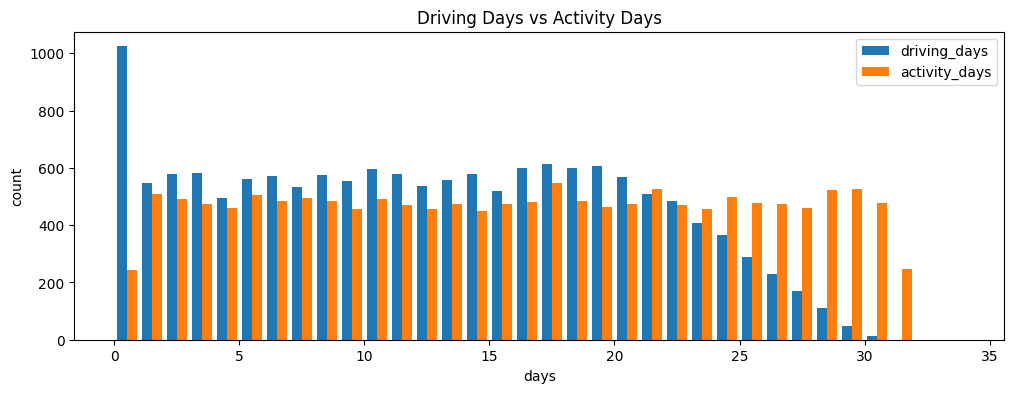

In [26]:
plt.figure(figsize =(12,4))
label = ['driving_days','activity_days']
plt.hist([df['driving_days'],df['activity_days']],bins = range(0,35),label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('Driving Days vs Activity Days');

At first glance, it might seem strange that there are fewer users who didn't open the app at all compared to those who didn't drive at all during the month. However, there are a few possible explanations for this.

One possibility is that people open the app more often than they use it to drive.

Another possibility is that the two variables are measuring different things. Driving_days measures the number of days that a user drove at least once, while activity_days measures the number of days that a user opened the app at least once. This means that it is possible for a user to have driven on some days but not opened the app on those days, and vice versa.

Regardless of the reason for the discrepancy, it is certainly worth investigating further. Contacting the data team at Waze could help to shed some light on this issue and provide more accurate information. Additionally, checking for errors in the data could help to ensure that the analysis is based on accurate information.

To verify the maximum recorded number of days for the two variables: driving_days and activity_days.

In [27]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


To check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

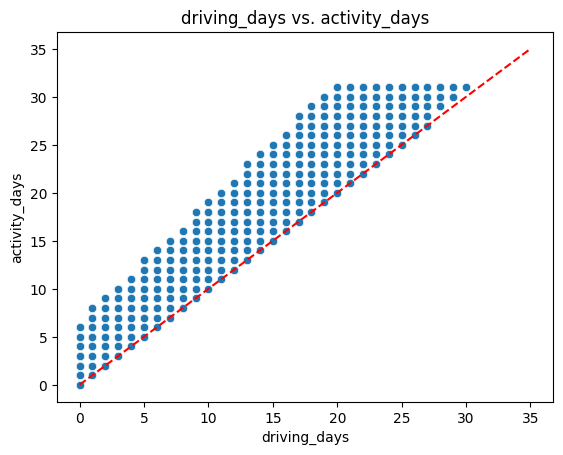

In [28]:
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,35], [0,35], color='red', linestyle='--');

Logically, the number of driven days cannot exceed the number of active days. This is because using the app to drive inherently implies app usage, making every driving day an active day as well. Examining the data reveals that this rule is not violated by any of the samples, which is reassuring.

#### 11. Retention by device

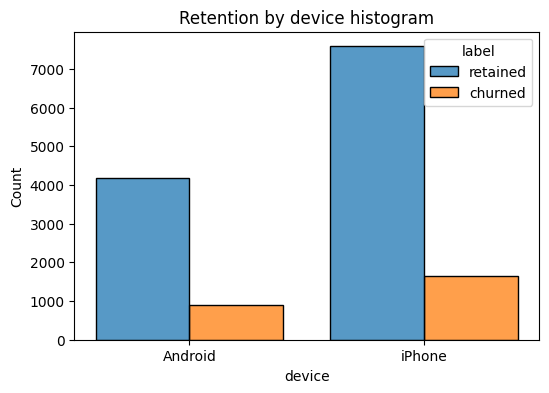

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(data = df,x='device',hue = 'label',multiple = 'dodge',shrink =.8)
plt.title('Retention by device histogram');

#### 12. Retention by kilometers driven per driving day

In [30]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

C:\Users\Eashwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Upon examining the descriptive statistics for the driving_days column, we observe some unusual values: an infinite mean, an undefined standard deviation (NaN), and an infinite maximum value. This peculiar behavior can be attributed to the presence of zero values within the driving_days data.

In [31]:
df.loc[df['km_per_driving_day']==np.inf,'km_per_driving_day'] =0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value recorded for distance driven per day is an astonishing 15,420 kilometers. This value seems physically impossible, as even driving at a continuous speed of 100 kilometers per hour for 12 hours would only cover 1,200 kilometers. Considering the practical limitations of driving, it is unlikely that many individuals would consistently exceed this daily distance. Therefore, it is advisable to temporarily disregard rows where the distance driven exceeds 1,200 kilometers for further analysis.

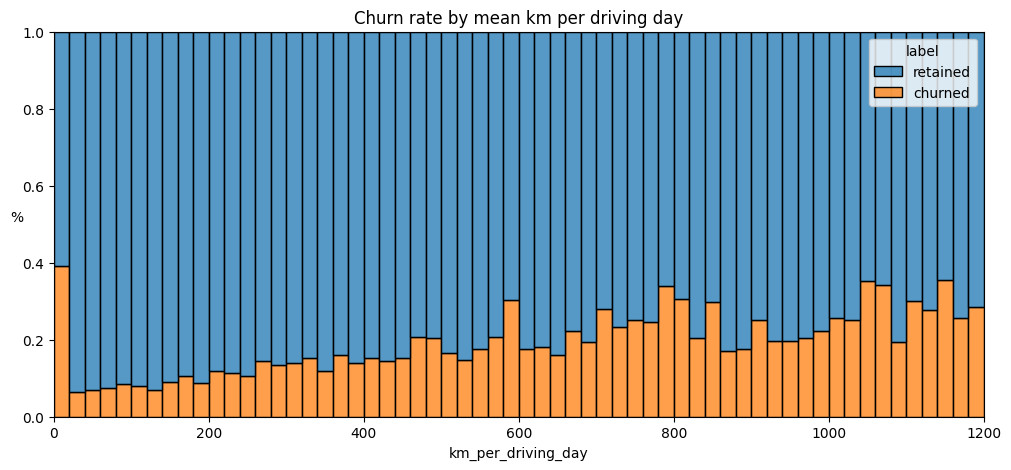

In [32]:
plt.figure(figsize=(12,5))
sns.histplot(data =df ,x= 'km_per_driving_day',bins =range(0,1201,20),hue = 'label',multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

As the average daily driving distance increases, there appears to be a corresponding rise in the churn rate. This observation warrants further investigation to uncover the underlying factors that may be driving long-distance users to discontinue using the app.

#### 13. Churn rate per number of driving days

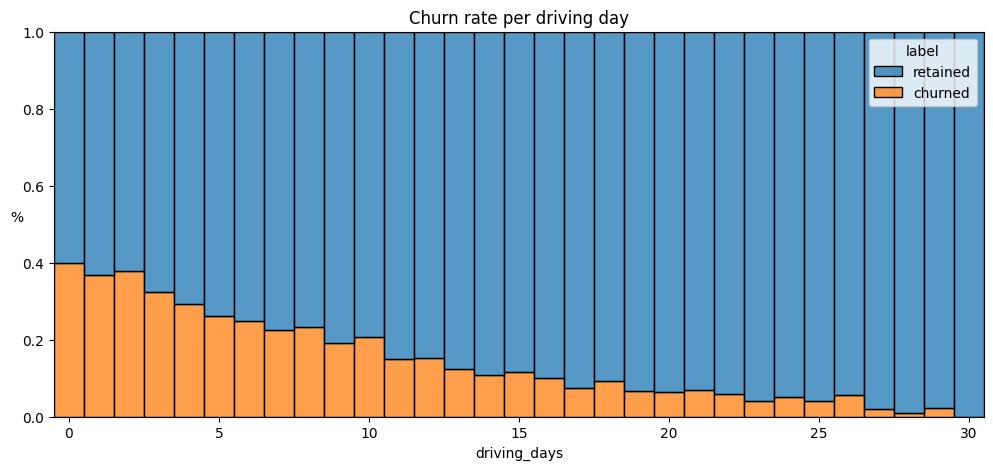

In [33]:
plt.figure(figsize=(12,5))
sns.histplot(data = df, x = 'driving_days',bins = range(0,32),hue ='label',multiple = 'fill',discrete = True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

An interesting pattern emerges when examining the churn rate across different levels of app usage. Users who rarely or never used Waze during the previous month exhibited the highest churn rate, reaching 40% for those who didn't open the app at all. Conversely, among users who actively engaged with the app, the churn rate progressively declined, reaching zero for those who used the app on all 30 days. This observation is not entirely unexpected. If users who frequently utilized the app were to churn, it would likely signal underlying dissatisfaction with the service. On the other hand, churn among users who barely used the app could stem from past grievances or a reduced need for a navigation application. For instance, they might have relocated to a city with a well-developed public transportation system, eliminating their dependence on driving.

#### 14 . Proportion of sessions that occurred in the last month

In [34]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

Median: 0.4


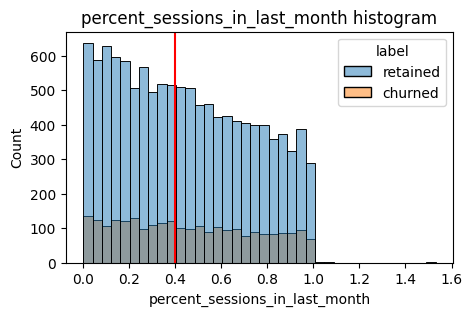

In [35]:
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

In [36]:
df['n_days_after_onboarding'].median()

1741.0

Despite the overall median time since onboarding approaching five years, indicating a longstanding user base, a notable portion of Waze users, approximately half, have significantly increased their app usage recently, with 40% or more of their sessions occurring within the past month alone. 

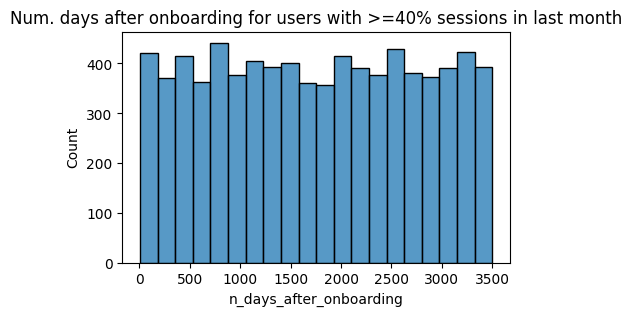

In [37]:
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The distribution of days since onboarding for users with a significant portion of their sessions concentrated in the last month exhibits a peculiar uniformity. This unexpected pattern warrants further investigation from Waze to uncover the underlying factors driving this surge in app usage among long-term users.

### **Handling outliers**

The box plots from the previous section revealed the presence of outliers in many of the variables. These outliers appear to be inherent to the right-skewed distributions rather than data entry errors. Depending on the intended use of the data, it may be beneficial to impute outlying values with more plausible values. To achieving this imputation is to establish a threshold based on a percentile of the distribution.

In [38]:
def outlier_imputer(column_name, percentile):
  
    threshold = df[column_name].quantile(percentile)
    df.loc[df[column_name] > threshold, column_name] = threshold
    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [39]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [40]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


### **Conclusion**

Analysis of the churn rate revealed an overall rate of approximately 17%, with no significant difference between iPhone and Android users. Further exploration through EDA (Exploratory Data Analysis) indicated that users who drive long distances on their driving days are more likely to churn, while those who drive more frequently are less likely to churn. The underlying reason for this discrepancy warrants further investigation and could be a valuable topic of discussion with the Waze data team.

Overall, the data quality was generally satisfactory, with no indication of any single variable being entirely inaccurate. However, several variables exhibited highly improbable or even impossible outlying values, such as driven_km_drives. Additionally, some monthly variables, such as activity_days and driving_days, raised concerns due to their differing maximum values (31 and 30, respectively). This suggests a potential discrepancy in data collection periods for these variables.